In [53]:
import os
import time
import string

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib import font_manager

In [54]:
path = 'Data/'
fnames = ['Fitting_cases.xlsx', 'result_beta.xlsx', 'Fitting_death.xlsx', 'result_f.xlsx']

In [55]:
dfs = [pd.read_excel(f'{path}{f}') for f in fnames]

df = pd.read_excel(path+fnames[1])

x = list(df['date'].values)+['2022.12.01']
periods = pd.to_datetime(x)
dates=[datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d') for x in periods]
dates2=[datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d') for x in periods]

In [56]:
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

colors = ("#984EA3","#377EB8","#4DAF4A","#FF7F00","#E41A1C")
# age_colors = ("#a3bf74","#629246","#1a592c","#9c6396","#e6b6c2")
# age_colors = ("#ed8b77","#dc5322","#a5142a","#310003","#0d1316")
# age_colors = ("#007b00","#24e0b8","#ffcc51","#ff8b76","#ff3031")
# age_colors = ("#88d5d2","#9c9d47","#fec842","#e97a2e","#834e71")
age_colors=('#984EA3', '#377EB8', '#4DAF4A', '#FF7F00', '#E41A1C')


In [57]:
N_ROW = 4
N_COL = 1
X_SIZE = 4.3
Y_SIZE = 2

fsize = 40
alphsize = 60

endData = x[-1]
col_size = 5


plt.rcParams['font.family'] = ['Arial']
# plt.rcParams.update({
#     "text.usetex": True})
ylabel = [f'Number of new cases', r'$\it{b}$      ', #f'Number of deaths', fr'$\beta$
          f'Cumulative\nNumber of deaths', r'$\it{f}$  ']#, f'Number of deaths', ]
alpha_1 = .18 #.2 #fillx
alpha_2 = .5
alpha_3 = .8

sd_color=['white','blue','green','orange','red']
sds=[3,3,3,2,4,4,4,4,4,1,4,4,4,4,0,0,0,0,0]

In [58]:
dates.remove('2021-09-23')

In [59]:
x=pd.to_datetime(df['date'])

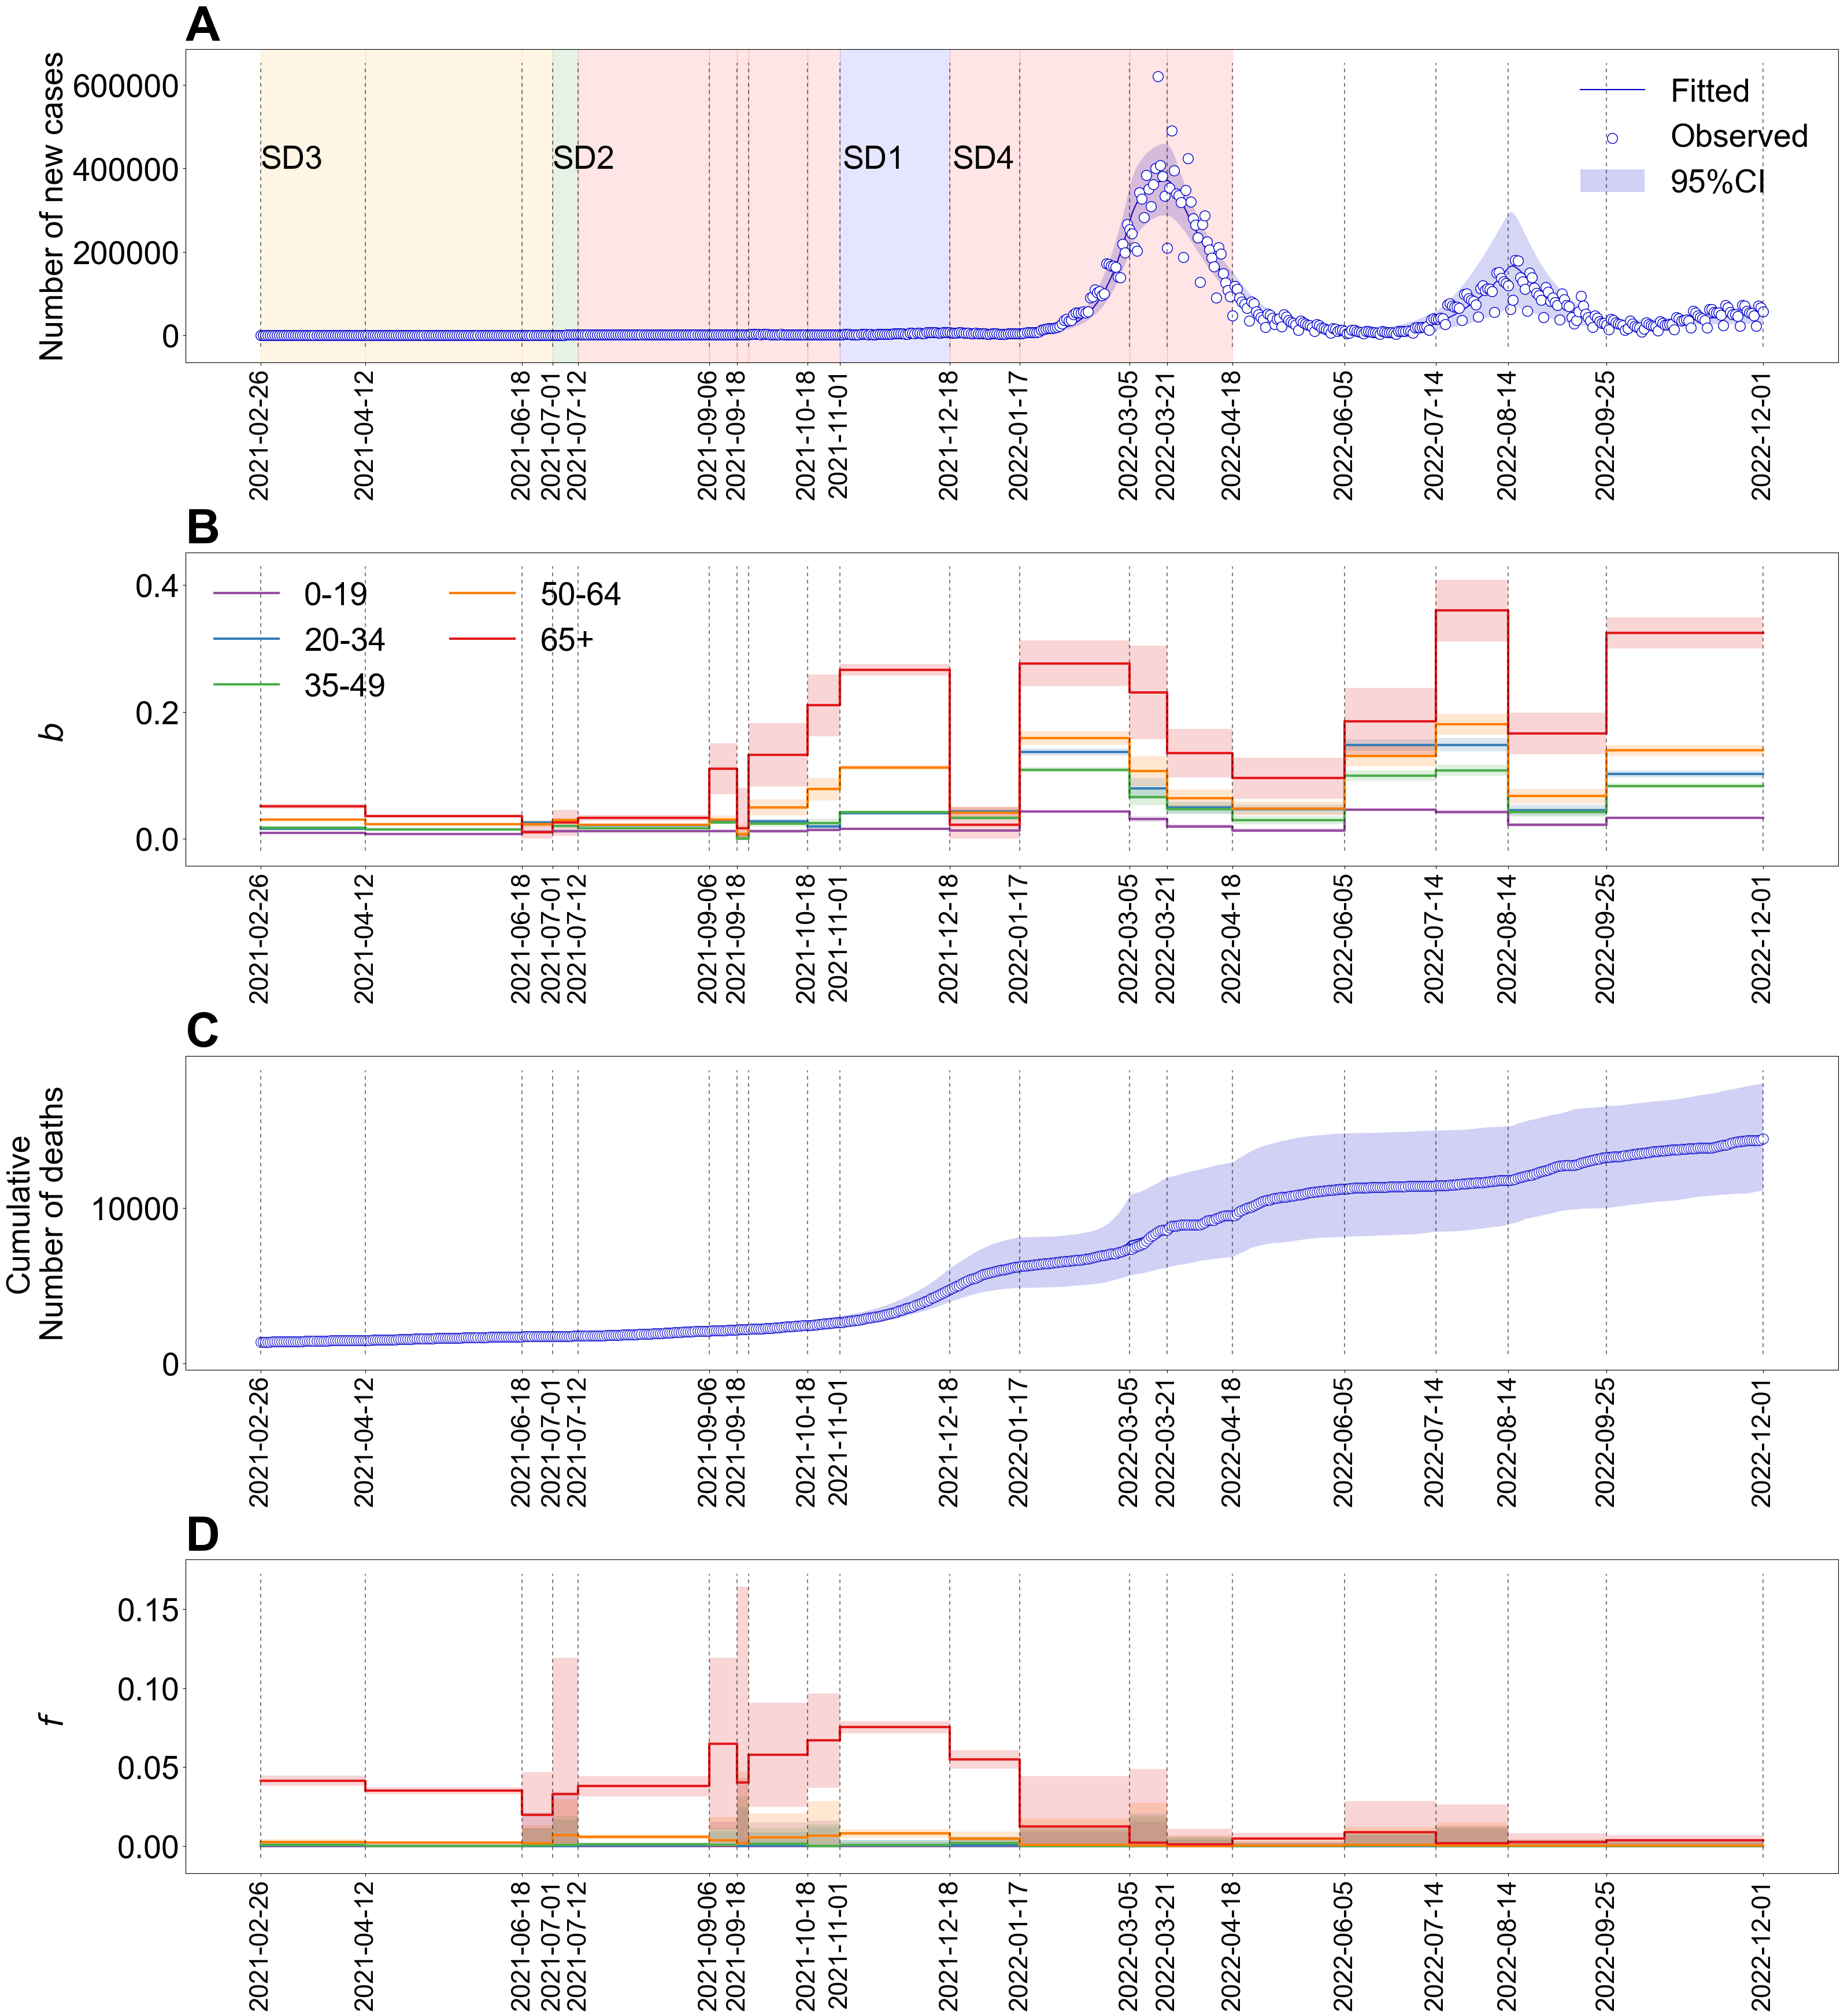

In [61]:
fig, ax = plt.subplots(figsize=(32, 35), nrows = N_ROW, ncols = N_COL)


## new cases
df=pd.read_excel(path+fnames[0])
x=pd.to_datetime(df['date'])
cname=['cases']

ax[0].text(.0, 1.03, '{}'.format(string.ascii_uppercase[0]), transform=ax[0].transAxes, size=alphsize, weight='bold')

ax[0].text(x[0],400000,'SD3', size=fsize)
ax[0].text(x[125],400000,'SD2', size=fsize)
ax[0].text(x[296],400000,'SD4', size=fsize)
ax[0].text(x[249],400000,'SD1', size=fsize)

ax[0].plot(x, df['mean'].values, c='mediumblue', label='Fitted', zorder=0)
ax[0].scatter(x,df[cname].values,c='white',s=20*2**3, ec='mediumblue', label='Observed', zorder=2)
# ax[0].scatter(x,df[cname].values,s=30, ec='mediumblue', label='Observed', zorder=2)

ax[0].fill_between(x, df['95+'].values, df['95-'].values, color='mediumblue', alpha=alpha_1, 
                     ec='none', label='95%CI')

ax[0].set_ylabel(ylabel[0], fontsize = fsize)

ylim = ax[0].get_ylim()
for pn in periods:
    ax[0].plot([pn, pn], ylim, alpha=alpha_2, color='black', linestyle=(5, (3, 3)))
    
ax[0].set_xticks(dates)
ax[0].set_xticklabels(dates, rotation=90, fontsize = fsize*0.8)
ax[0].tick_params(axis = 'y', labelsize = fsize)


## beta
df = pd.read_excel(path+fnames[1])
df.loc[df.index[-1]+1] = df.loc[df.index[-1]] 
df.loc[df.index[-1],df.columns[0]] = endData

yname = df.columns[1:1+5]
    
try:
    x = pd.to_datetime(df['date'])
except:
    x = pd.to_datetime(df['Date'])
coln = 1
cols = df.columns[coln:coln+col_size]


ax[1].text(.0, 1.03, '{}'.format(string.ascii_uppercase[1]), transform=ax[1].transAxes, size=alphsize, weight='bold')

for i, col in enumerate(cols):
    ax[1].step(x ,df[col].values, label=col, c=age_colors[i], where='post',linewidth=3)
    ax[1].fill_between(x, df[col+'.2'].values, [max(_,0) for _ in df[col+'.1'].values], 
                        step='post', alpha=.18, color=age_colors[i], ec='none')
# _ = ax[1].xticks([],[], rotation=0)

ax[1].set_ylabel(ylabel[1], fontsize = fsize, style='italic')
ylim = ax[1].get_ylim()
for pn in periods:
    ax[1].plot([pn, pn], ylim, alpha=alpha_2, color='black', linestyle=(5, (3, 3)))
    
ax[1].set_xticks(dates)
ax[1].set_xticklabels(dates, rotation=90, fontsize = fsize*0.8)
ax[1].tick_params(axis = 'y', labelsize = fsize)




## death
df=pd.read_excel(path+fnames[2])
x=pd.to_datetime(df['date'])
cname=['death']


ax[2].text(.0, 1.03, '{}'.format(string.ascii_uppercase[2]), transform=ax[2].transAxes, size=alphsize, weight='bold')
ax[2].plot(x, df['mean'].values, c='mediumblue', label='fitted', zorder=0)
ax[2].scatter(x,df[cname].values,c='white',s=20*2**3, alpha=alpha_3, ec='mediumblue', label='observed', zorder=2)
ax[2].fill_between(x, df['95+'].values, df['95-'].values, color='mediumblue', alpha=alpha_1, 
                     ec='none', label='95%CI')

df = pd.read_excel(path+fnames[3])

df.loc[df.index[-1]+1] = df.loc[df.index[-1]] 
df.loc[df.index[-1],df.columns[0]] = endData

yname = df.columns[1:1+5]
    
try:
    x = pd.to_datetime(df['date'])
except:
    x = pd.to_datetime(df['Date'])
coln = 1
cols = df.columns[coln:coln+col_size]

ax[2].set_ylabel(ylabel[2], fontsize = fsize)
ylim = ax[2].get_ylim()
for pn in periods:
    ax[2].plot([pn, pn], ylim, alpha=alpha_2, color='black', linestyle=(5, (3, 3)))

ax[2].set_xticks(dates)
ax[2].set_xticklabels(dates, rotation=90, fontsize = fsize*0.8)
ax[2].tick_params(axis = 'y', labelsize = fsize)


## f

ax[3].text(.0, 1.03, '{}'.format(string.ascii_uppercase[3]), transform=ax[3].transAxes, size=alphsize, weight='bold')

for i, col in enumerate(cols):
    ax[3].step(x ,df[col].values, label=col, c=age_colors[i], where='post',linewidth=3)
    ax[3].fill_between(x, df[col+'.2'].values, [max(_,0) for _ in df[col+'.1'].values], 
                        step='post', alpha=.18, color=age_colors[i], ec='none')
# _ = ax[1].xticks([],[], rotation=0)

ax[3].set_ylabel(ylabel[3], fontsize = fsize, style='italic')
ylim = ax[3].get_ylim()
for pn in periods:
    ax[3].plot([pn, pn], ylim, alpha=alpha_2, color='black', linestyle=(5, (3, 3)))

ax[3].set_xticks(dates)
ax[3].set_xticklabels(dates, rotation=90, fontsize = fsize*0.8)
ax[3].tick_params(axis = 'y', labelsize = fsize)

ax[0].legend(framealpha=0., fontsize=fsize, loc='upper right')
ax[1].legend(framealpha=0., fontsize=fsize, loc='upper left',ncol=2)
    

for i in range(len(dates2)-1):
    ax[0].axvspan(dates2[i],dates2[i+1],color=sd_color[sds[i]], alpha=0.1)


fig.align_xlabels(ax)
fig.align_ylabels(ax)
fig.tight_layout()

fig.savefig('Fig3.pdf', format='pdf', bbox_inches='tight', pad_inches=.1, dpi=300)
fig.savefig('Fig3.tif', format='tif', bbox_inches='tight', pad_inches=.1, dpi=300)


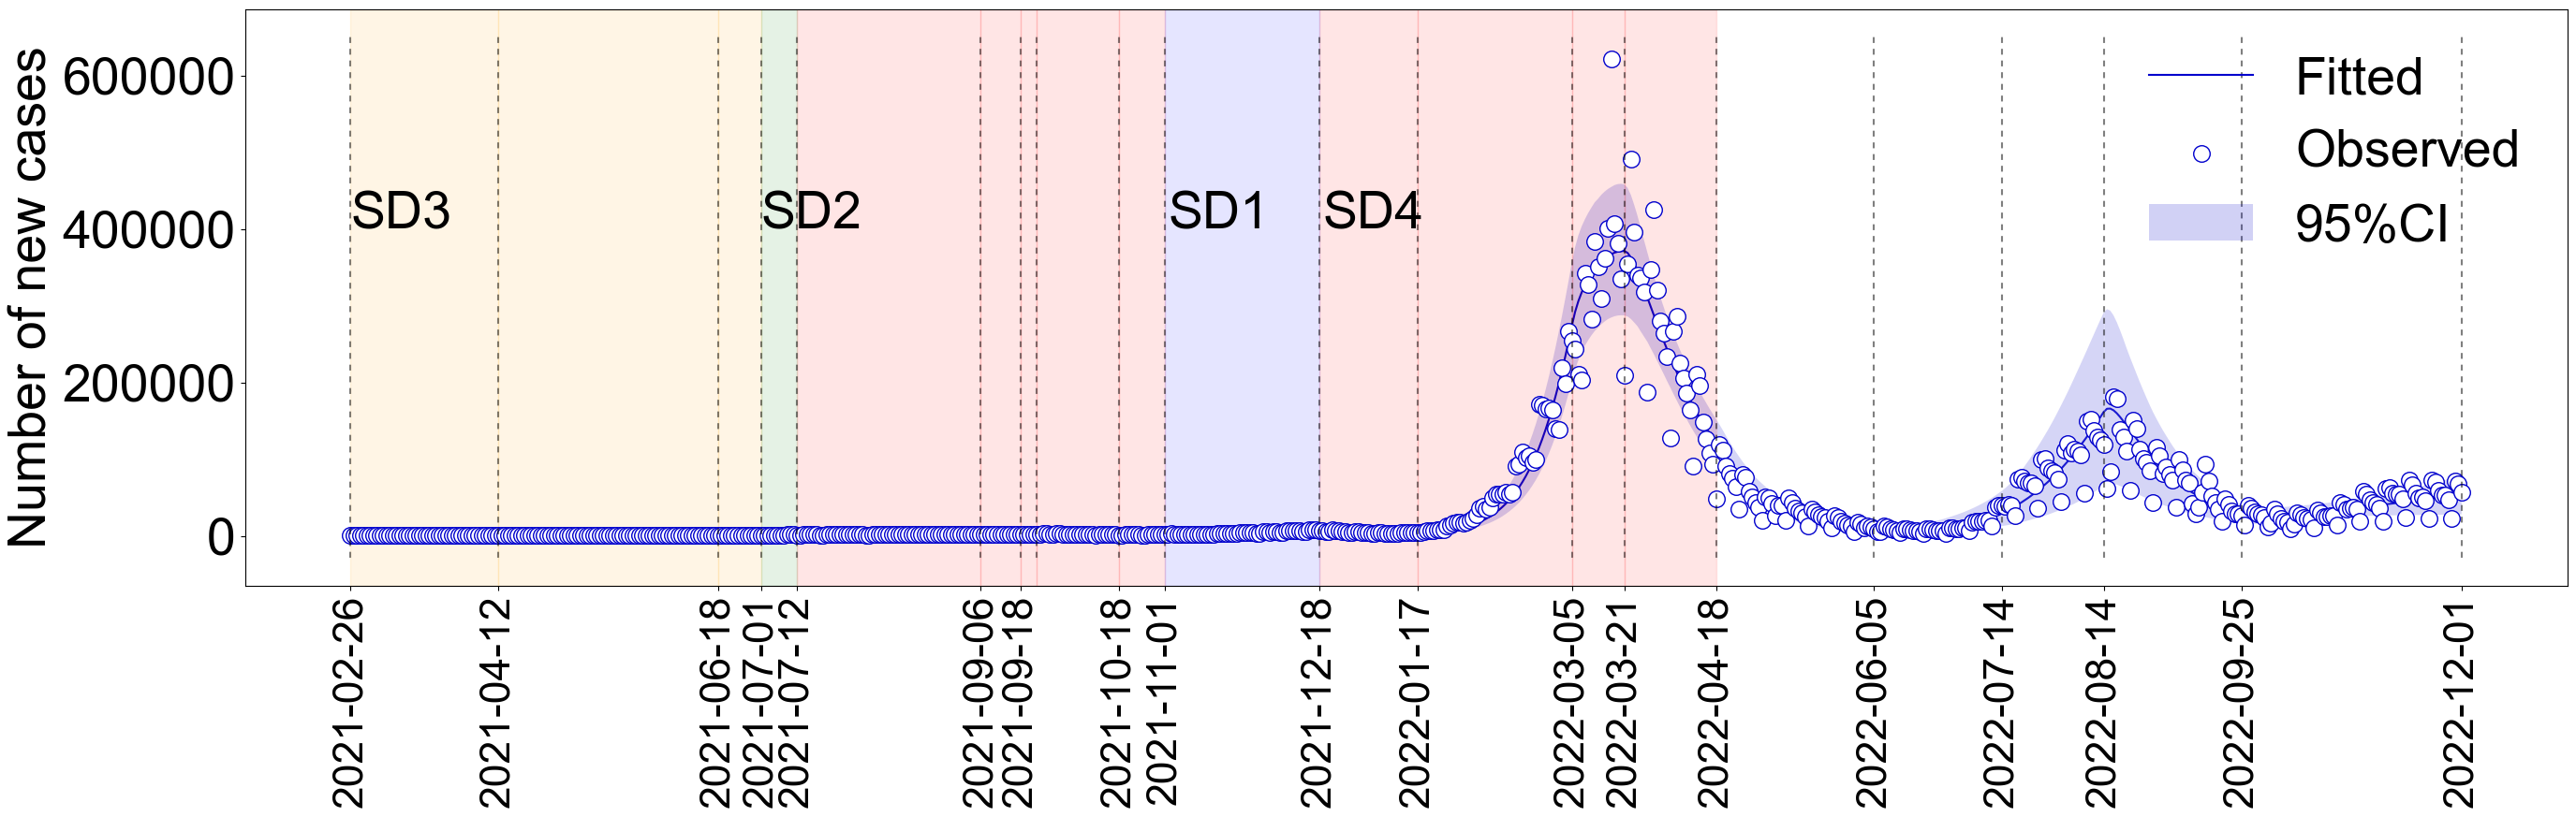

In [73]:
mosaic="""A"""
fsize = 40
alphsize = 60
fig, ax= plt.subplot_mosaic(mosaic=mosaic, constrained_layout=False, figsize=(32, 8))

## new cases
df=pd.read_excel(path+fnames[0])
x=pd.to_datetime(df['date'])
cname=['cases']

# ax[0].text(.0, 1.03, '{}'.format(string.ascii_uppercase[0]), transform=ax[0].transAxes, size=alphsize, weight='bold')

ax['A'].text(x[0],400000,'SD3', size=fsize)
ax['A'].text(x[125],400000,'SD2', size=fsize)
ax['A'].text(x[296],400000,'SD4', size=fsize)
ax['A'].text(x[249],400000,'SD1', size=fsize)

ax['A'].plot(x, df['mean'].values, c='mediumblue', label='Fitted', zorder=0)
ax['A'].scatter(x,df[cname].values,c='white',s=20*2**3, ec='mediumblue', label='Observed', zorder=2)
# ax[0].scatter(x,df[cname].values,s=30, ec='mediumblue', label='Observed', zorder=2)

ax['A'].fill_between(x, df['95+'].values, df['95-'].values, color='mediumblue', alpha=alpha_1, 
                     ec='none', label='95%CI')

ax['A'].set_ylabel(ylabel[0], fontsize = fsize)

ylim = ax['A'].get_ylim()
for pn in periods:
    ax['A'].plot([pn, pn], ylim, alpha=alpha_2, color='black', linestyle=(5, (3, 3)))
    
ax['A'].set_xticks(dates)
ax['A'].set_xticklabels(dates, rotation=90, fontsize = fsize*0.8)
ax['A'].tick_params(axis = 'y', labelsize = fsize)
for i in range(len(dates2)-1):
    ax['A'].axvspan(dates2[i],dates2[i+1],color=sd_color[sds[i]], alpha=0.1)
    
ax['A'].legend(framealpha=0., fontsize=fsize, loc='upper right')

fig.savefig('Fig3A.pdf', format='pdf', bbox_inches='tight', pad_inches=.1, dpi=300)
fig.savefig('Fig3A.tif', format='tif', bbox_inches='tight', pad_inches=.1, dpi=300)